# Método racional deductivo

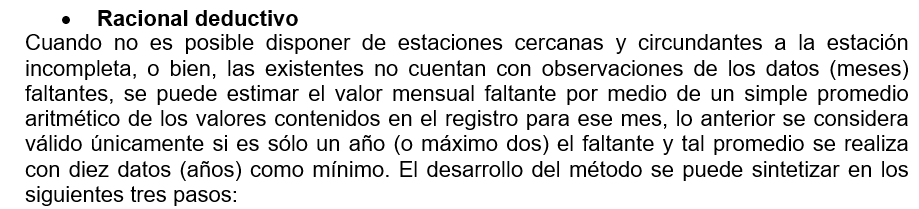

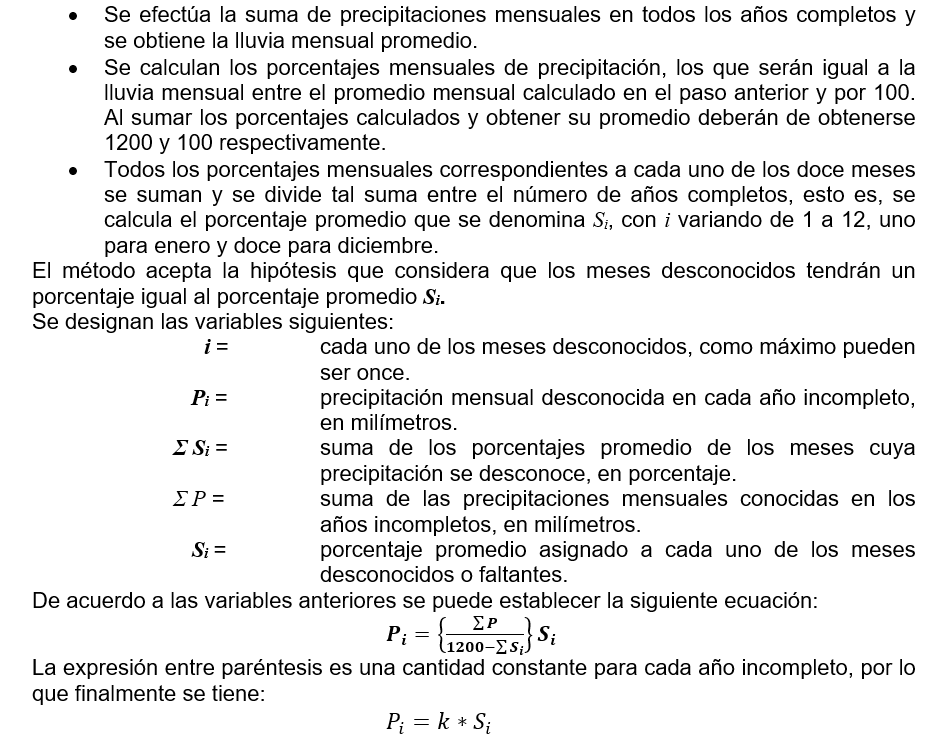

### Librerías utilizadas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Cargamos la base de datos:

In [2]:
df = pd.read_csv("C://Users/ferna/BASE_DE_DATOS/EJEMPLO_INTERNET.csv") # Importamos la base de datos 

### Veamos la base de datos con datos faltantes:

In [3]:
print("Base de datos original:") # Como debe ser cargada

df

Base de datos original:


,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,79.8,50.4,18.0,87.6,71.4,44.7,80.4,95.9,136.7,77.3,162.9,37.7
1,29.0,84.4,40.4,382.3,282.5,46.9,57.7,83.6,79.1,213.9,186.5,24.3
2,112.6,109.4,NaN,NaN,129.0,33.9,52.9,NaN,NaN,146.6,37.3,26.8
3,60.5,3.5,37.6,194.3,85.6,100.5,86.5,53.6,99.4,197.4,41.3,76.4
4,21.9,16.6,3.3,136.3,154.6,70.9,130.0,210.5,85.8,169.4,185.8,80.5
5,5.7,30.5,76.5,141.2,186.1,18.3,106.4,110.6,104.5,183.8,191.4,122.7
6,100.4,88.3,88.9,172.6,176.9,106.6,73.9,76.8,97.6,134.7,157.6,106.2
7,86.9,0.8,36.9,18.1,191.2,116.2,172.0,56.8,76.9,139.9,147.8,19.1
8,0.7,58.3,58.7,99.1,32.9,88.2,84.7,187.0,116.3,202.6,222.3,82.3
9,110.2,36.0,104.8,203.5,93.3,68.6,90.3,140.1,155.7,157.0,163.6,36.7


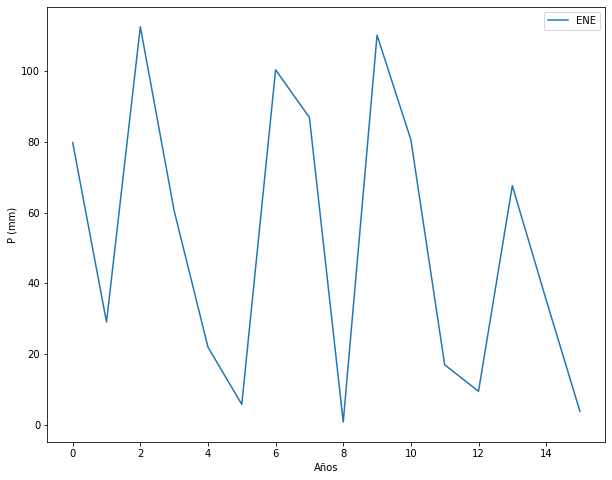

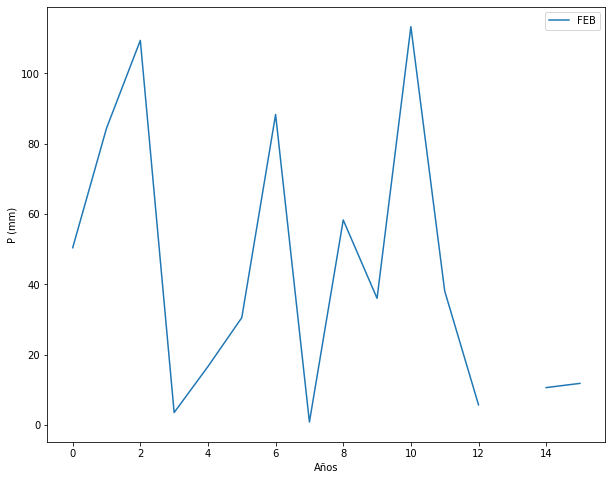

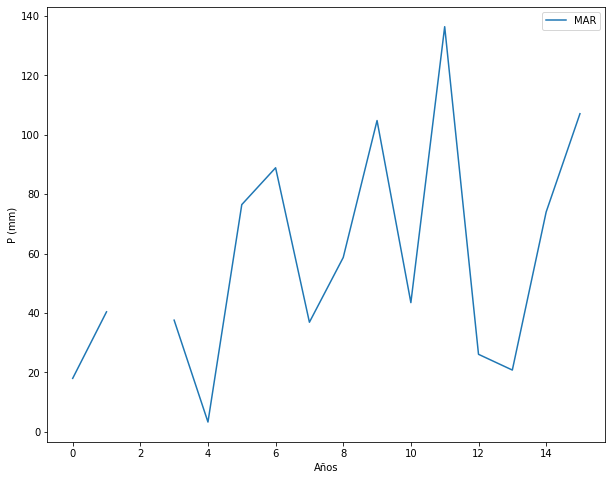

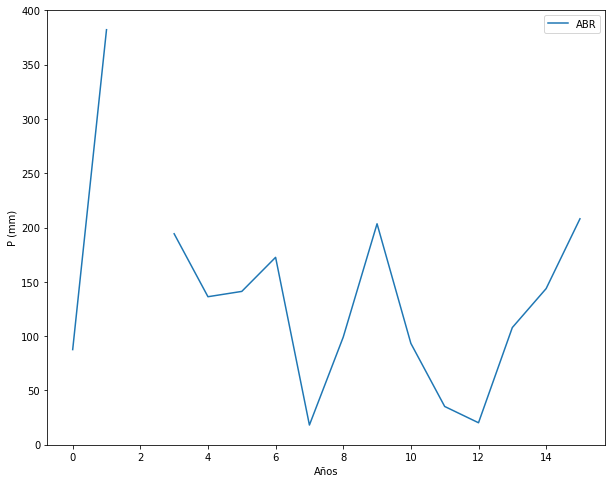

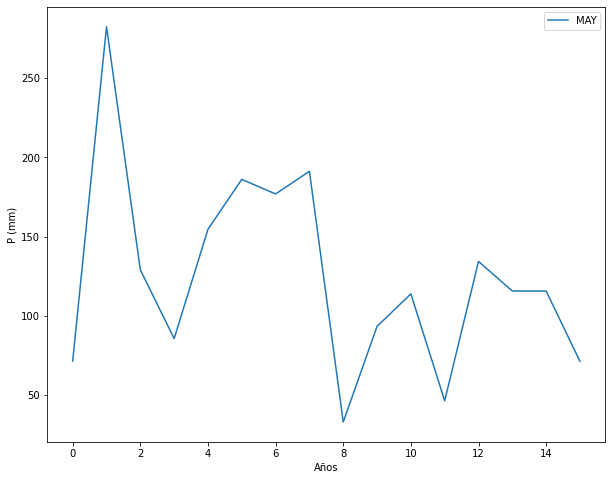

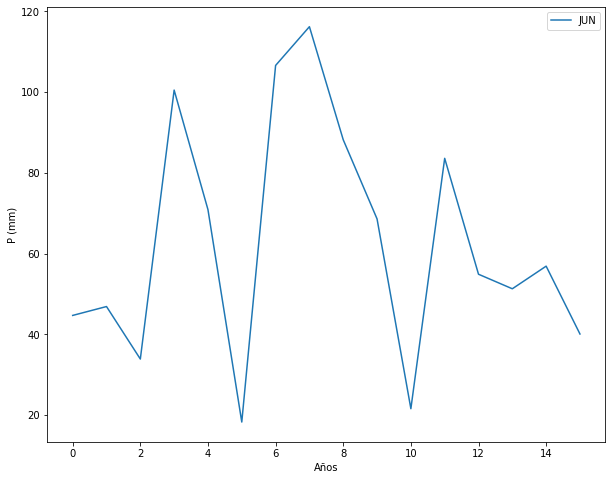

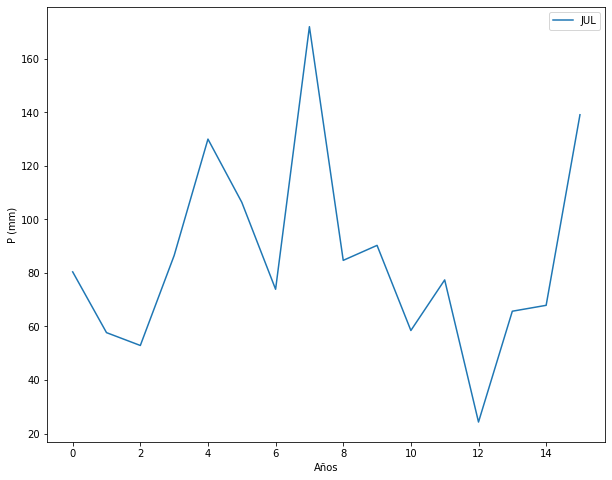

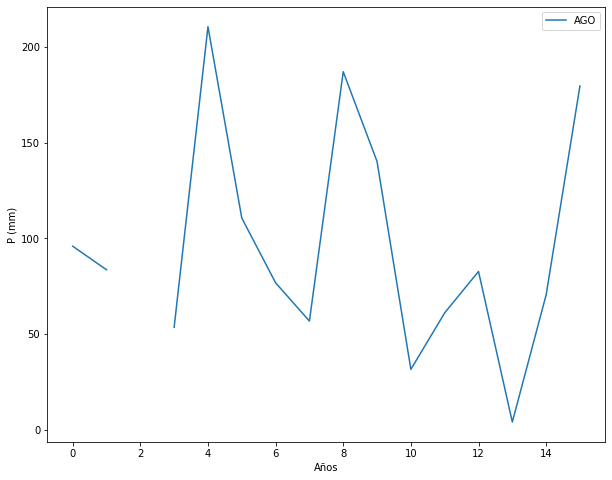

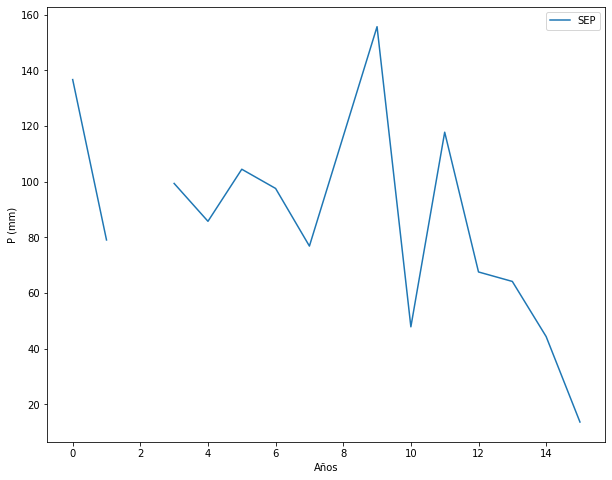

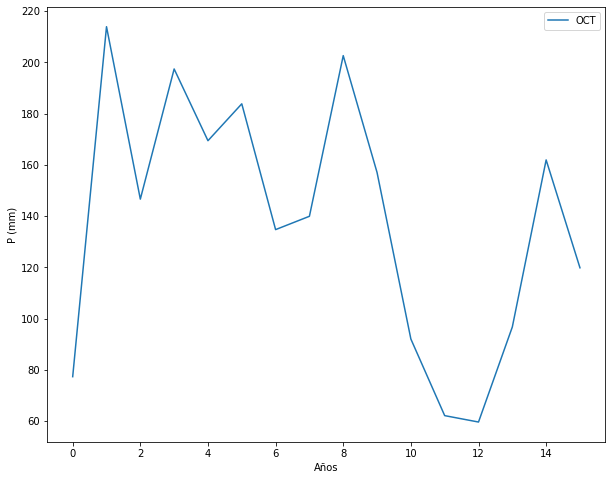

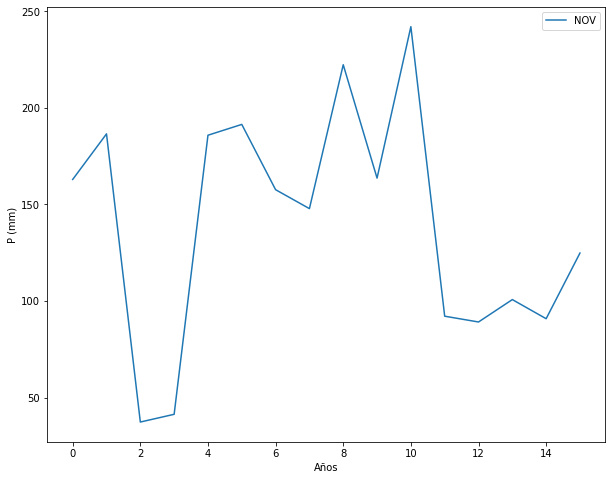

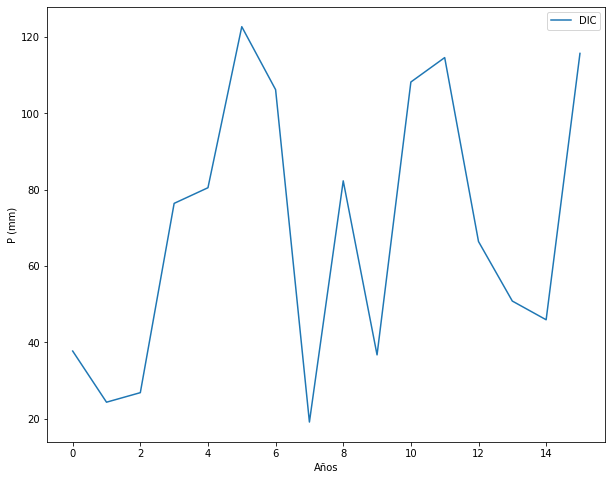

In [4]:
# Visualizamos los datos tal y como los importamos

for i in range(len(df.iloc[0,0:12])):
    

    fig = plt.figure(figsize=(10,8))

    plt.plot(df.iloc[:,i], label = df.columns[i])

    plt.xlabel("Años")

    plt.ylabel("P (mm)")

    plt.legend()

    plt.show()

### Mostramos la base de datos sólo con los años que tienen al menos un mes de registro

In [5]:
el_vacios = []

# Aquí se obtienen los índices de los años completamente vacíos:

for i in range(len(df.iloc[:,0])):
    
    if df.iloc[i,:].isna().sum() == 12:
        el_vacios.append(i)
    else:
        continue
        
df.drop(el_vacios,axis=0,inplace=True) # Aquí se eliminan los años complettamente vacíos
df.reset_index(drop=True, inplace=True) # Aquí se vuelve a indezar para continuar con el procedimiento

sp = []
nans = []

for i in range(len(df.iloc[:,0])):
    sp.append(df.iloc[i,:].sum())
    nans.append(df.iloc[i,:].isna().sum())

df["Suma_parcial"] = sp
df["NaN's"] = nans

print("Base de datos con la Suma parcial y los NaN's que contiene:")

df

Base de datos con la Suma parcial y los NaN's que contiene:


,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,Suma_parcial,NaN's
0,79.8,50.4,18.0,87.6,71.4,44.7,80.4,95.9,136.7,77.3,162.9,37.7,942.8,0
1,29.0,84.4,40.4,382.3,282.5,46.9,57.7,83.6,79.1,213.9,186.5,24.3,1510.6,0
2,112.6,109.4,NaN,NaN,129.0,33.9,52.9,NaN,NaN,146.6,37.3,26.8,648.5,4
3,60.5,3.5,37.6,194.3,85.6,100.5,86.5,53.6,99.4,197.4,41.3,76.4,1036.6,0
4,21.9,16.6,3.3,136.3,154.6,70.9,130.0,210.5,85.8,169.4,185.8,80.5,1265.6,0
5,5.7,30.5,76.5,141.2,186.1,18.3,106.4,110.6,104.5,183.8,191.4,122.7,1277.7,0
6,100.4,88.3,88.9,172.6,176.9,106.6,73.9,76.8,97.6,134.7,157.6,106.2,1380.5,0
7,86.9,0.8,36.9,18.1,191.2,116.2,172.0,56.8,76.9,139.9,147.8,19.1,1062.6,0
8,0.7,58.3,58.7,99.1,32.9,88.2,84.7,187.0,116.3,202.6,222.3,82.3,1233.1,0
9,110.2,36.0,104.8,203.5,93.3,68.6,90.3,140.1,155.7,157.0,163.6,36.7,1359.8,0


In [6]:
a_c = [] # Aquí se almacenan todos los años sin datos faltantes

for i in range(len(df.iloc[:,0])):
    
    if df.iloc[i,13] == 0:
        a_c.append(df.iloc[i,0:12])
    else:
        continue

ndf = pd.DataFrame(data = np.array(a_c), columns=df.drop(["Suma_parcial", "NaN's"], axis = 1).columns)

prom_mensual = [] # Aquí se obtienen el promedio mensual por año

for i in range(len(ndf.iloc[:,0])):
    
    prom_mensual.append(ndf.iloc[i,:].sum() / 12)

ndf = pd.DataFrame(data = a_c, columns=df.drop(["Suma_parcial", "NaN's"], axis = 1).columns)

ndf.reset_index(drop=True, inplace=True)

ndf["Promedio mensual"] = prom_mensual

print("Base de datos con el promedio mensual de los años completos:")

# ndf

Base de datos con el promedio mensual de los años completos:


In [7]:
promedios = [] # Aquí se almacenan el valor del mes entre el promedio * 100

for i in range(len(ndf.iloc[:,0])):
    for j in range(len(ndf.iloc[0,0:12])):
        promedios.append((ndf.iloc[i,j]/ndf.iloc[i,12])*100)

prom = [] # Aquí se almacenan para poderlos obtener en data frame:

for i in range(0, len(promedios), 12):
    prom.append(promedios[i:i+12])

promedios = pd.DataFrame(data=prom, columns = ndf.drop(["Promedio mensual"], axis = 1).columns)

# promedios

In [8]:
indice = [] # Aquí se guarda la suma del mes de todos los años 

for i in range(len(promedios.iloc[0,:])):
    indice.append(promedios.iloc[:,i].sum())
    
indice = pd.DataFrame(data = np.array(indice).reshape(1,12), columns=promedios.columns)

si = []

for i in range(len(indice.iloc[0,:])):
    
    si.append(indice.iloc[0,i]/(len(promedios.iloc[:,0])))
    

si = pd.DataFrame(data = np.array(si).reshape(1,12), columns=promedios.columns)

# print("\nEstos son los índices si:")

# si

In [9]:
suma_si = []
suma_si_dos = []

for i in range(len(df.iloc[:,0])):
    suma_si = []
    for j in range(len(df.iloc[0,0:12])):
        if math.isnan(df.iloc[i,j]):
            suma_si.append(si.iloc[0,j])
    suma_si_dos.append(np.array(suma_si).sum())      
    
            
df["Suma_si"] = suma_si_dos

In [10]:
for i in range(len(df.iloc[:,0])):
    for j in range(len(df.iloc[0,0:12])):
        if math.isnan(df.iloc[i,j]):
            df.iloc[i,j] = (df.iloc[i,12] / (1200 - df.iloc[i,14])) * si.iloc[0,j]

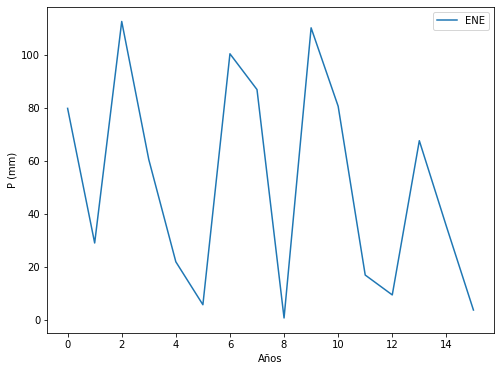

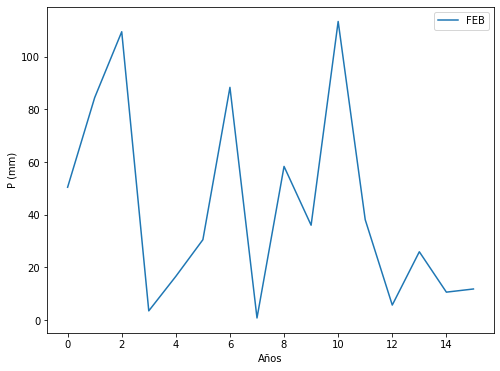

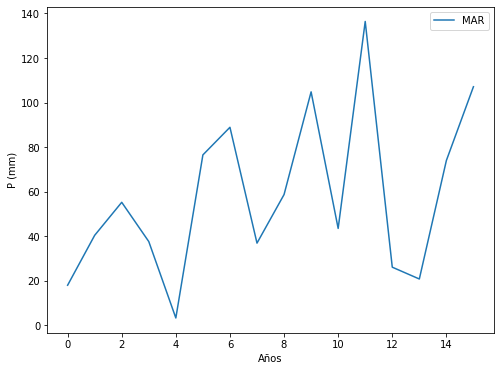

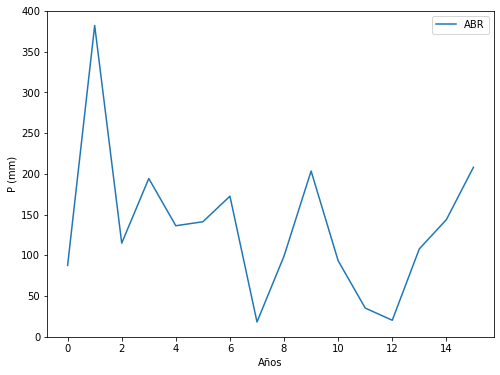

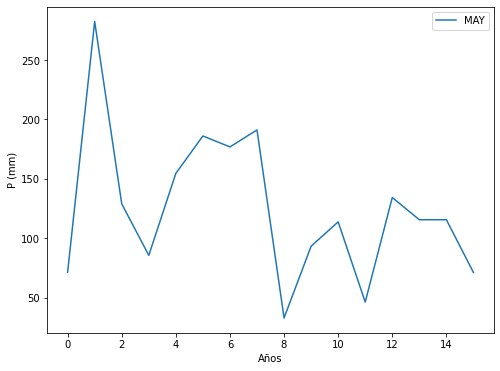

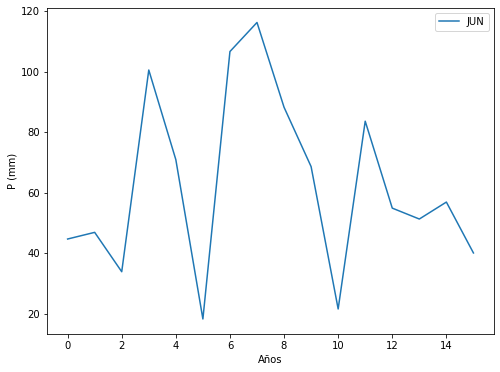

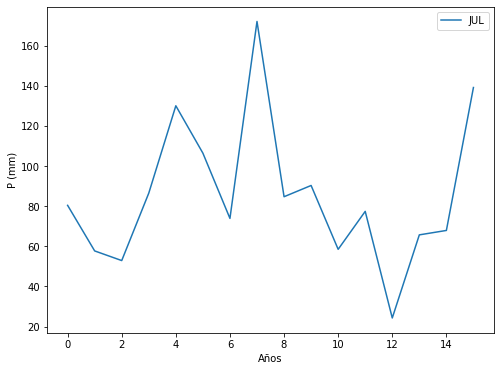

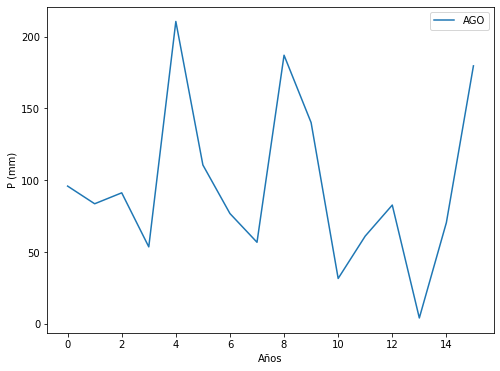

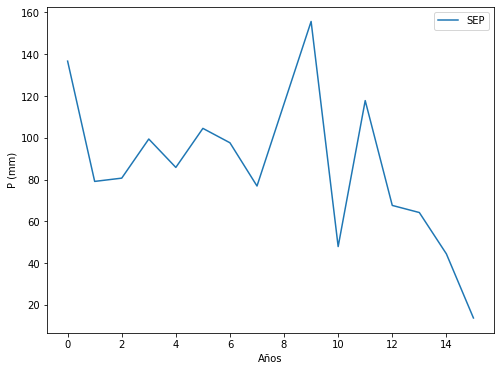

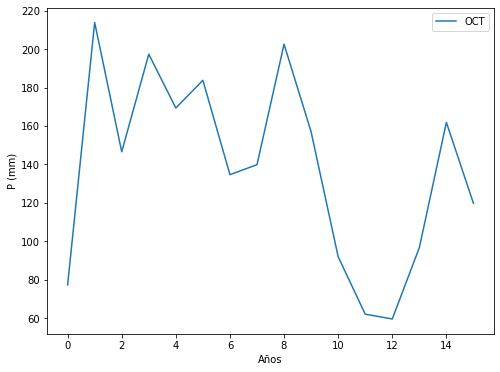

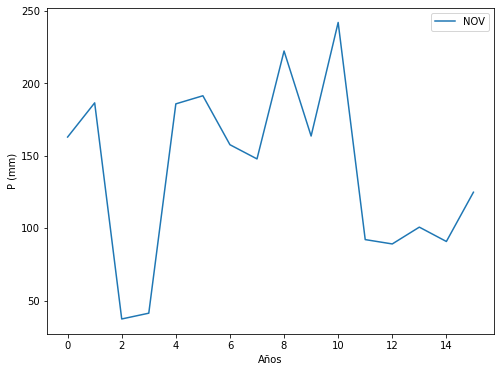

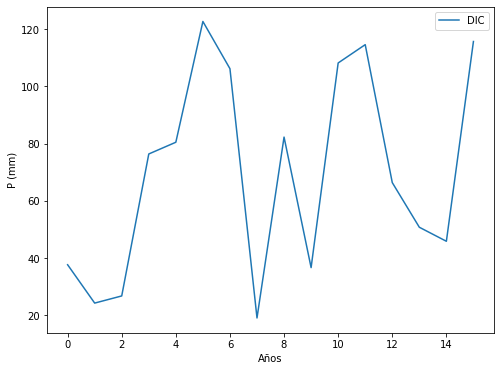

In [11]:
df_final = pd.DataFrame(data = df.drop(["Suma_parcial", "NaN's", "Suma_si"], axis=1), columns=si.columns)

# Visualizamos la serie de datos completos (completados con el método analizado)

for i in range(len(df.iloc[0,0:12])):
    

    fig = plt.figure(figsize=(8,6))

    plt.plot(df.iloc[:,i], label = df.columns[i])

    plt.xlabel("Años")

    plt.ylabel("P (mm)")

    plt.legend()

    plt.show()

In [12]:
print("La versión final es la siguiente:")

df_final

La versión final es la siguiente:


,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,79.8,50.400000,18.000000,87.600000,71.4,44.7,80.4,95.900000,136.700000,77.3,162.9,37.7
1,29.0,84.400000,40.400000,382.300000,282.5,46.9,57.7,83.600000,79.100000,213.9,186.5,24.3
2,112.6,109.400000,55.220782,114.936525,129.0,33.9,52.9,91.214398,80.669088,146.6,37.3,26.8
3,60.5,3.500000,37.600000,194.300000,85.6,100.5,86.5,53.600000,99.400000,197.4,41.3,76.4
4,21.9,16.600000,3.300000,136.300000,154.6,70.9,130.0,210.500000,85.800000,169.4,185.8,80.5
5,5.7,30.500000,76.500000,141.200000,186.1,18.3,106.4,110.600000,104.500000,183.8,191.4,122.7
6,100.4,88.300000,88.900000,172.600000,176.9,106.6,73.9,76.800000,97.600000,134.7,157.6,106.2
7,86.9,0.800000,36.900000,18.100000,191.2,116.2,172.0,56.800000,76.900000,139.9,147.8,19.1
8,0.7,58.300000,58.700000,99.100000,32.9,88.2,84.7,187.000000,116.300000,202.6,222.3,82.3
9,110.2,36.000000,104.800000,203.500000,93.3,68.6,90.3,140.100000,155.700000,157.0,163.6,36.7


In [13]:
df_final.to_csv("C://Users/ferna/BASE_DE_DATOS/FINAL_PRUEBA.csv") # Aquí se guarda el archivo en formato .csv